# Download data

In [1]:
import pandas as pd
import os 
import tarfile 
import urllib.request # module này thường được sử dụng để mở và lấy URL

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/sang18112001/Machine_Learning/main/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):# kiem tra su ton tai cua file
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz") # Noi duong dan trong python: tra ve: "datasets/housing/housing.tgz"
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


# Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


# Get the data

In [3]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
     csv_path = os.path.join(housing_path, "housing.csv") # csv_path = "datasets/housing/housing.csv"
     return pd.read_csv(csv_path)

In [65]:
housing_data = load_housing_data()
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_data["ocean_proximity"].value_counts() # Tính tần số xuất hiện của các giá trị khac nhau trong một cột


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
#housing.describe() # Tóm tắt các thuộc tính số. 

<AxesSubplot:>

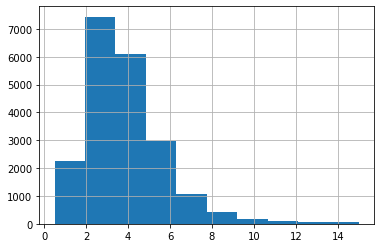

In [9]:
# ve biểu của các thuộc tính số
housing_data["median_income"].hist() #  hàm vẽ biểu đồ tần số xuất hiện của các số khác nhau trong 1 thuộc tính

In [10]:
housing_data["median_income"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [11]:
housing_data["income_cat"] = np.ceil(housing_data["median_income"] / 1.5)
# Label those above 5 as 5 (những giá trị nhỏ hơn 5 thì để nguyên còn lớn hơn 5 gán bằng 5)
housing_data["income_cat"].where(housing_data["income_cat"] < 5, 5.0, inplace=True)


In [12]:
housing_data["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

<AxesSubplot:>

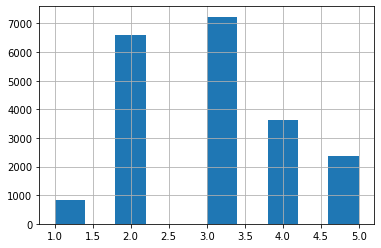

In [13]:
housing_data["income_cat"].hist()

In [14]:
y = housing_data["median_house_value"]
X = housing_data.drop("median_house_value", axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2.0


# Split the data

## Split training_data and testing_data 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

<AxesSubplot:>

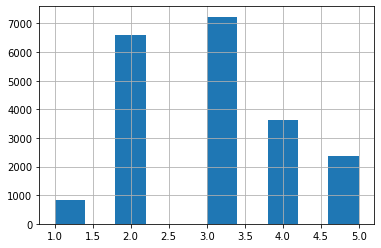

In [16]:
housing_data["income_cat"].hist()

<AxesSubplot:>

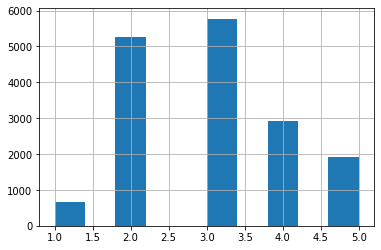

In [17]:
X_train["income_cat"].hist()

In [18]:
X_train["income_cat"].value_counts()

3.0    5773
2.0    5251
4.0    2916
5.0    1906
1.0     666
Name: income_cat, dtype: int64

## Stratified Split

Dựa vào tính chất của "income_cat" để chia data thành 5 nhóm theo 1 cột

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [20]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
10275,-117.87,33.86,28.0,2292.0,531.0,2197.0,509.0,3.4856,142800.0,<1H OCEAN,3.0
20601,-121.57,39.13,30.0,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,2.0
20138,-119.05,34.40,50.0,1236.0,282.0,1079.0,257.0,2.6991,181300.0,<1H OCEAN,2.0
18028,-121.94,37.24,35.0,1484.0,244.0,664.0,238.0,4.6750,245300.0,<1H OCEAN,4.0
16289,-121.30,37.92,28.0,3308.0,766.0,3201.0,720.0,1.7694,73900.0,INLAND,2.0
...,...,...,...,...,...,...,...,...,...,...,...
6358,-117.97,34.14,33.0,1328.0,348.0,903.0,329.0,3.1094,136000.0,INLAND,3.0
618,-122.15,37.73,45.0,3758.0,819.0,1573.0,736.0,2.8355,245400.0,NEAR BAY,2.0
3407,-118.30,34.25,44.0,1442.0,285.0,859.0,292.0,4.5833,197300.0,<1H OCEAN,4.0
17590,-121.91,37.31,46.0,3052.0,587.0,1373.0,590.0,4.7287,340000.0,<1H OCEAN,4.0


In [21]:
housing_data["income_cat"].value_counts() 


3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [22]:
strat_train_set["income_cat"].value_counts()

3.0    5789
2.0    5265
4.0    2911
5.0    1889
1.0     658
Name: income_cat, dtype: int64

In [23]:
strat_train_set.drop(["income_cat"], axis = "columns", inplace = True)

In [24]:
strat_test_set.drop(["income_cat"], axis = "columns", inplace = True)

# Discover and visualize the data

## Visualize data

In [25]:
training = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

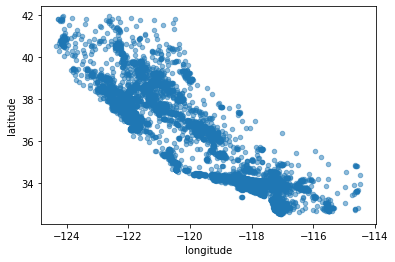

In [26]:
# distribution of district in califonrnia
training.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.5)


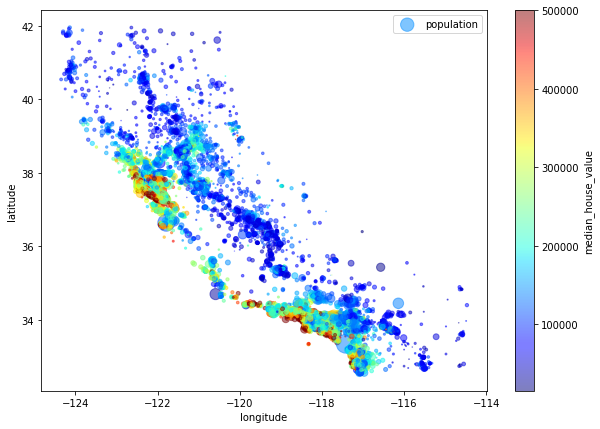

In [27]:
training.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=training["population"]/100, label="population", figsize=(10,7),
    c="median_house_value",  cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend() 

## Correlation matrix

In [28]:
training.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924903,-0.108097,0.041547,0.065183,0.096933,0.051827,-0.013645,-0.043236
latitude,-0.924903,1.000000,0.010784,-0.034359,-0.064436,-0.106834,-0.069613,-0.081262,-0.145570
housing_median_age,-0.108097,0.010784,1.000000,-0.359036,-0.317509,-0.293215,-0.300756,-0.113458,0.107144
total_rooms,0.041547,-0.034359,-0.359036,1.000000,0.929552,0.853612,0.918026,0.196382,0.137469
total_bedrooms,0.065183,-0.064436,-0.317509,0.929552,1.000000,0.874315,0.980162,-0.009282,0.053544
population,0.096933,-0.106834,-0.293215,0.853612,0.874315,1.000000,0.903795,0.003431,-0.023797
households,0.051827,-0.069613,-0.300756,0.918026,0.980162,0.903795,1.000000,0.011840,0.069177
median_income,-0.013645,-0.081262,-0.113458,0.196382,-0.009282,0.003431,0.011840,1.000000,0.688883
median_house_value,-0.043236,-0.145570,0.107144,0.137469,0.053544,-0.023797,0.069177,0.688883,1.000000


# Prepair the data for Machine Learning 

In [29]:
housing = strat_train_set.drop("median_house_value", axis = 1)

In [30]:
housing_label = strat_train_set["median_house_value"].copy()

## Dealing with missing value


In [31]:
# dataframe.isnull(): Return true if data is NaN else data is not NaN


In [32]:
housing.isnull().any(axis = 1).value_counts() # nhung gia tri NaN chuyen thanh True

False    16344
True       168
dtype: int64

In [33]:
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)] # lay 5 hang dau cua cac missing value

sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13069,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,INLAND
2028,-119.75,36.71,38.0,1481.0,NaN,1543.0,372.0,1.4577,INLAND
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND
6590,-118.18,34.19,48.0,1371.0,NaN,528.0,155.0,15.0001,<1H OCEAN
17825,-121.88,37.40,9.0,6751.0,NaN,4240.0,1438.0,5.3400,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
5990,-117.73,34.10,37.0,3457.0,NaN,1344.0,530.0,5.8891,INLAND
15030,-117.02,32.78,31.0,2567.0,NaN,1198.0,499.0,3.4659,<1H OCEAN
18261,-122.08,37.37,29.0,1229.0,NaN,707.0,194.0,7.1108,NEAR BAY
4046,-118.49,34.13,24.0,4394.0,NaN,1443.0,528.0,11.2979,<1H OCEAN


#### Option 1: Drop the rows with missing values in any columns

In [34]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) # Xóa những hàng có giá trị NaN tại cột "total_bedrooms"

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


#### Option 2: Drop the columns with missing values

In [35]:
sample_incomplete_rows.drop("total_bedrooms", axis=1) 

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
13069,-121.30,38.58,16.0,1537.0,1125.0,375.0,2.6471,INLAND
2028,-119.75,36.71,38.0,1481.0,1543.0,372.0,1.4577,INLAND
13311,-117.61,34.08,12.0,4427.0,2400.0,843.0,4.7147,INLAND
6590,-118.18,34.19,48.0,1371.0,528.0,155.0,15.0001,<1H OCEAN
17825,-121.88,37.40,9.0,6751.0,4240.0,1438.0,5.3400,<1H OCEAN
...,...,...,...,...,...,...,...,...
5990,-117.73,34.10,37.0,3457.0,1344.0,530.0,5.8891,INLAND
15030,-117.02,32.78,31.0,2567.0,1198.0,499.0,3.4659,<1H OCEAN
18261,-122.08,37.37,29.0,1229.0,707.0,194.0,7.1108,NEAR BAY
4046,-118.49,34.13,24.0,4394.0,1443.0,528.0,11.2979,<1H OCEAN


#### Option 3: Impute (fill in) the values with some replacement value (can replace the missing value with median of column). 

In [36]:
median = housing["total_bedrooms"].median() # Tính giá trị trung bình của cột "total_bedroom"

In [37]:
sample_incomplete_rows["total_bedrooms"].head().fillna(median, inplace=True) # replace the missing value with median
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13069,-121.30,38.58,16.0,1537.0,436.0,1125.0,375.0,2.6471,INLAND
2028,-119.75,36.71,38.0,1481.0,436.0,1543.0,372.0,1.4577,INLAND
13311,-117.61,34.08,12.0,4427.0,436.0,2400.0,843.0,4.7147,INLAND
6590,-118.18,34.19,48.0,1371.0,436.0,528.0,155.0,15.0001,<1H OCEAN
17825,-121.88,37.40,9.0,6751.0,436.0,4240.0,1438.0,5.3400,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
5990,-117.73,34.10,37.0,3457.0,NaN,1344.0,530.0,5.8891,INLAND
15030,-117.02,32.78,31.0,2567.0,NaN,1198.0,499.0,3.4659,<1H OCEAN
18261,-122.08,37.37,29.0,1229.0,NaN,707.0,194.0,7.1108,NEAR BAY
4046,-118.49,34.13,24.0,4394.0,NaN,1443.0,528.0,11.2979,<1H OCEAN


In [38]:
# Imputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [39]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [40]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [41]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2128.5   ,  436.    , 1167.    ,
        410.    ,    3.5341])

In [42]:
X = imputer.transform(housing_num)


In [43]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [44]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.87,33.86,28.0,2292.0,531.0,2197.0,509.0,3.4856
1,-121.57,39.13,30.0,442.0,103.0,413.0,88.0,1.5694
2,-119.05,34.40,50.0,1236.0,282.0,1079.0,257.0,2.6991
3,-121.94,37.24,35.0,1484.0,244.0,664.0,238.0,4.6750
4,-121.30,37.92,28.0,3308.0,766.0,3201.0,720.0,1.7694
...,...,...,...,...,...,...,...,...
16507,-117.97,34.14,33.0,1328.0,348.0,903.0,329.0,3.1094
16508,-122.15,37.73,45.0,3758.0,819.0,1573.0,736.0,2.8355
16509,-118.30,34.25,44.0,1442.0,285.0,859.0,292.0,4.5833
16510,-121.91,37.31,46.0,3052.0,587.0,1373.0,590.0,4.7287


## Encoding Categorical Data

In [45]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(20)

,ocean_proximity
10275,<1H OCEAN
20601,INLAND
20138,<1H OCEAN
18028,<1H OCEAN
16289,INLAND
4622,<1H OCEAN
15280,NEAR OCEAN
17228,<1H OCEAN
14268,NEAR OCEAN
1229,INLAND


In [46]:
# Mã hóa các features thành số nguyên 
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [47]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
# Mã hóa categories dưới dạng ma trận
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot[:10]# Creates a "dense array" meaning that all instances have a value not just the ones that are encoded

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [49]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Feature Engineering

In [50]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10275,-117.87,33.86,28.0,2292.0,531.0,2197.0,509.0,3.4856
20601,-121.57,39.13,30.0,442.0,103.0,413.0,88.0,1.5694
20138,-119.05,34.40,50.0,1236.0,282.0,1079.0,257.0,2.6991
18028,-121.94,37.24,35.0,1484.0,244.0,664.0,238.0,4.6750
16289,-121.30,37.92,28.0,3308.0,766.0,3201.0,720.0,1.7694
...,...,...,...,...,...,...,...,...
6358,-117.97,34.14,33.0,1328.0,348.0,903.0,329.0,3.1094
618,-122.15,37.73,45.0,3758.0,819.0,1573.0,736.0,2.8355
3407,-118.30,34.25,44.0,1442.0,285.0,859.0,292.0,4.5833
17590,-121.91,37.31,46.0,3052.0,587.0,1373.0,590.0,4.7287


In [51]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    return data

In [52]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
10275,-117.87,33.86,28.0,2292.0,531.0,2197.0,509.0,3.4856,1.043222,4.316306,4.502947
20601,-121.57,39.13,30.0,442.0,103.0,413.0,88.0,1.5694,1.170455,4.693182,5.022727
20138,-119.05,34.40,50.0,1236.0,282.0,1079.0,257.0,2.6991,1.097276,4.198444,4.809339
18028,-121.94,37.24,35.0,1484.0,244.0,664.0,238.0,4.6750,1.025210,2.789916,6.235294
16289,-121.30,37.92,28.0,3308.0,766.0,3201.0,720.0,1.7694,1.063889,4.445833,4.594444
...,...,...,...,...,...,...,...,...,...,...,...
6358,-117.97,34.14,33.0,1328.0,348.0,903.0,329.0,3.1094,1.057751,2.744681,4.036474
618,-122.15,37.73,45.0,3758.0,819.0,1573.0,736.0,2.8355,1.112772,2.137228,5.105978
3407,-118.30,34.25,44.0,1442.0,285.0,859.0,292.0,4.5833,0.976027,2.941781,4.938356
17590,-121.91,37.31,46.0,3052.0,587.0,1373.0,590.0,4.7287,0.994915,2.327119,5.172881


## Scaling Data

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[ 0.84450121, -0.82473693, -0.04853356, ..., -0.12157905,
         0.11361593, -0.38320306],
       [-1.00168564,  1.64070891,  0.11081943, ...,  0.16974326,
         0.14811788, -0.16739639],
       [ 0.25571729, -0.5721106 ,  1.70434932, ...,  0.00218813,
         0.10282589, -0.25599289],
       ...,
       [ 0.62994436, -0.64228458,  1.22629035, ..., -0.27543346,
        -0.0122183 , -0.20242628],
       [-1.17133524,  0.78926462,  1.38564334, ..., -0.23218624,
        -0.06848902, -0.10505418],
       [ 0.62994436, -0.71713683,  0.03114293, ..., -0.0377015 ,
         0.04295583, -1.03019125]])

## Concatenating with Categorical Variables

In [54]:
# Nối các trục theo hàng ngang
ml_input_data = np.hstack([housing_cat_1hot, housing_scaled])

In [55]:
ml_input_data

array([[ 1.        ,  0.        ,  0.        , ..., -0.12157905,
         0.11361593, -0.38320306],
       [ 0.        ,  1.        ,  0.        , ...,  0.16974326,
         0.14811788, -0.16739639],
       [ 1.        ,  0.        ,  0.        , ...,  0.00218813,
         0.10282589, -0.25599289],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.27543346,
        -0.0122183 , -0.20242628],
       [ 1.        ,  0.        ,  0.        , ..., -0.23218624,
        -0.06848902, -0.10505418],
       [ 1.        ,  0.        ,  0.        , ..., -0.0377015 ,
         0.04295583, -1.03019125]])

In [56]:
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
10275,-117.87,33.86,28.0,2292.0,531.0,2197.0,509.0,3.4856,1.043222,4.316306,4.502947
20601,-121.57,39.13,30.0,442.0,103.0,413.0,88.0,1.5694,1.170455,4.693182,5.022727
20138,-119.05,34.40,50.0,1236.0,282.0,1079.0,257.0,2.6991,1.097276,4.198444,4.809339
18028,-121.94,37.24,35.0,1484.0,244.0,664.0,238.0,4.6750,1.025210,2.789916,6.235294
16289,-121.30,37.92,28.0,3308.0,766.0,3201.0,720.0,1.7694,1.063889,4.445833,4.594444
...,...,...,...,...,...,...,...,...,...,...,...
6358,-117.97,34.14,33.0,1328.0,348.0,903.0,329.0,3.1094,1.057751,2.744681,4.036474
618,-122.15,37.73,45.0,3758.0,819.0,1573.0,736.0,2.8355,1.112772,2.137228,5.105978
3407,-118.30,34.25,44.0,1442.0,285.0,859.0,292.0,4.5833,0.976027,2.941781,4.938356
17590,-121.91,37.31,46.0,3052.0,587.0,1373.0,590.0,4.7287,0.994915,2.327119,5.172881


## Pipeline

In [57]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):

    ### Separate Labels if they Exist ###
    # Kiểm tra nếu tồn tại "median house value" thì tách labels bằng "median house value"
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
        
    else:
        labels = None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # We're encoding this variable, so we don't need it in our list anymore


    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    ### Concatening all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features

# Select and Train model  

## Transform our data using the "pipeline" we created

In [58]:
train_data, train_labels, features= data_transformations(strat_train_set)

In [59]:
test_data, test_labels, features = data_transformations(strat_test_set)

## Linear Regression

In [60]:
# Train model with train_data and train_labels
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)


LinearRegression()

In [61]:
original_values = test_labels[:5] # lấy 5 giá trị đầu tiên của test_labels

predicted_values = lin_reg.predict(test_data[:5]) 

comparison_dataframe = pd.DataFrame(data={"Original Values":original_values, "Predicted Values":predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]

comparison_dataframe

,Original Values,Predicted Values,Differences
5784,209600.0,238165.157652,-28565.157652
378,92500.0,168723.714423,-76223.714423
11018,349500.0,399155.127234,-49655.127234
20392,287100.0,309382.435363,-22282.435363
1999,93900.0,69345.473394,24554.526606


In [62]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values) # mean squared error: giá trị toàn phương trung bình
lin_rmse = np.sqrt(lin_mse) # root mean squared error
lin_rmse

45146.619442303156

In [63]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_rmae = np.sqrt(lin_mae)
lin_rmae

200.6394583716782